# Image Data Exploration and Dimensionality Reduction on RSNA X-Ray Data

by: Carter Koehler

## 1. Understanding the Data

The primary purpose of this dataset is to determine a person's age based on their bone structure examined in an x-ray. The real value of this is determining how mature a person's skeleton is to determine if the patient has any perceptible growth defects, especially for children. For example, if a person's skeleton indicates that they should be 7 years old, but they are in fact 10, they are likely suffering from some sort of endocrine disorder. However, there are not many good quantitative measures for this, even fewer of which are fast and fully automated.

If a prediction algorithm were able to compute the age of a person's skeleton based on their x-ray data, that would likely be enough to determine whether they are suffering from endocrine dysfunction affecting the skeleton.

In [2]:
import numpy as np
import scipy as sci
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

import os
import sys

from matplotlib import rcParams

rcParams['figure.figsize'] = 8,7

## 2. Preparing the Data

### 2.1 Reading in the Data

In [3]:
file_dir = os.path.join(os.pardir, 'data')

raw_data = pd.read_csv(os.path.join(file_dir, 'boneage.csv'))

label_data = raw_data.iloc[:2000]

label_data.head()

,id,boneage,male
0,1377,180,False
1,1378,12,False
2,1379,94,False
3,1380,120,True
4,1381,82,False


In [4]:
# HDD's are slow

image_data = pd.DataFrame(columns=range(65536))

In [5]:
compressed_dir = os.path.join(file_dir, 'boneage-compressed')

**Staring here, do not run the notebook cells. They are meant to be run once and then recovered later.**

In [6]:
from PIL import Image

# Do not run this. Only to be run once to compress images

image_dir = os.path.join(file_dir, 'boneage-training-dataset')

for i in label_data.id: #list(label_data.id):
    file_name = str(i) + '.png'
    temp_image = Image.open(os.path.join(image_dir, file_name))
    
    # resize image to close to average (computed offline)

    temp_image = temp_image.resize((256,256))
    temp_image.save(os.path.join(compressed_dir, str(i) + '-compressed.png'))
    
#     pix_vals = np.array(temp_image.resize((256,256))).flatten()
#     image_data = pd.concat([image_data, pd.DataFrame(pix_vals).T])
    
    print(file_name + ' has been added')

1377.pnghas been added
1378.pnghas been added
1379.pnghas been added
1380.pnghas been added
1381.pnghas been added
1382.pnghas been added
1383.pnghas been added
1384.pnghas been added
1385.pnghas been added
1387.pnghas been added
1388.pnghas been added
1389.pnghas been added
1390.pnghas been added
1391.pnghas been added
1393.pnghas been added
1394.pnghas been added
1395.pnghas been added
1396.pnghas been added
1398.pnghas been added
1399.pnghas been added
1400.pnghas been added
1402.pnghas been added
1403.pnghas been added
1404.pnghas been added
1405.pnghas been added
1406.pnghas been added
1407.pnghas been added
1408.pnghas been added
1409.pnghas been added
1411.pnghas been added
1412.pnghas been added
1414.pnghas been added
1415.pnghas been added
1416.pnghas been added
1417.pnghas been added
1418.pnghas been added
1419.pnghas been added
1420.pnghas been added
1422.pnghas been added
1423.pnghas been added
1424.pnghas been added
1425.pnghas been added
1426.pnghas been added
1427.pnghas

1778.pnghas been added
1779.pnghas been added
1780.pnghas been added
1781.pnghas been added
1782.pnghas been added
1783.pnghas been added
1784.pnghas been added
1785.pnghas been added
1786.pnghas been added
1787.pnghas been added
1789.pnghas been added
1790.pnghas been added
1791.pnghas been added
1792.pnghas been added
1793.pnghas been added
1794.pnghas been added
1796.pnghas been added
1797.pnghas been added
1798.pnghas been added
1799.pnghas been added
1800.pnghas been added
1801.pnghas been added
1802.pnghas been added
1803.pnghas been added
1804.pnghas been added
1806.pnghas been added
1807.pnghas been added
1808.pnghas been added
1810.pnghas been added
1811.pnghas been added
1812.pnghas been added
1813.pnghas been added
1814.pnghas been added
1815.pnghas been added
1816.pnghas been added
1817.pnghas been added
1818.pnghas been added
1819.pnghas been added
1820.pnghas been added
1821.pnghas been added
1823.pnghas been added
1825.pnghas been added
1826.pnghas been added
1827.pnghas

2177.pnghas been added
2178.pnghas been added
2180.pnghas been added
2181.pnghas been added
2182.pnghas been added
2183.pnghas been added
2184.pnghas been added
2185.pnghas been added
2186.pnghas been added
2187.pnghas been added
2188.pnghas been added
2189.pnghas been added
2192.pnghas been added
2193.pnghas been added
2194.pnghas been added
2195.pnghas been added
2196.pnghas been added
2197.pnghas been added
2200.pnghas been added
2201.pnghas been added
2202.pnghas been added
2203.pnghas been added
2204.pnghas been added
2205.pnghas been added
2206.pnghas been added
2207.pnghas been added
2208.pnghas been added
2209.pnghas been added
2210.pnghas been added
2211.pnghas been added
2212.pnghas been added
2213.pnghas been added
2214.pnghas been added
2216.pnghas been added
2217.pnghas been added
2219.pnghas been added
2220.pnghas been added
2221.pnghas been added
2222.pnghas been added
2223.pnghas been added
2224.pnghas been added
2225.pnghas been added
2226.pnghas been added
2227.pnghas

2572.pnghas been added
2573.pnghas been added
2574.pnghas been added
2575.pnghas been added
2576.pnghas been added
2577.pnghas been added
2578.pnghas been added
2579.pnghas been added
2580.pnghas been added
2581.pnghas been added
2582.pnghas been added
2583.pnghas been added
2584.pnghas been added
2585.pnghas been added
2586.pnghas been added
2587.pnghas been added
2588.pnghas been added
2589.pnghas been added
2590.pnghas been added
2591.pnghas been added
2592.pnghas been added
2594.pnghas been added
2595.pnghas been added
2596.pnghas been added
2597.pnghas been added
2598.pnghas been added
2599.pnghas been added
2600.pnghas been added
2601.pnghas been added
2603.pnghas been added
2604.pnghas been added
2605.pnghas been added
2606.pnghas been added
2607.pnghas been added
2608.pnghas been added
2609.pnghas been added
2611.pnghas been added
2612.pnghas been added
2613.pnghas been added
2614.pnghas been added
2615.pnghas been added
2616.pnghas been added
2617.pnghas been added
2618.pnghas

2970.pnghas been added
2971.pnghas been added
2974.pnghas been added
2975.pnghas been added
2976.pnghas been added
2977.pnghas been added
2978.pnghas been added
2979.pnghas been added
2980.pnghas been added
2982.pnghas been added
2983.pnghas been added
2984.pnghas been added
2985.pnghas been added
2986.pnghas been added
2987.pnghas been added
2988.pnghas been added
2989.pnghas been added
2990.pnghas been added
2991.pnghas been added
2992.pnghas been added
2993.pnghas been added
2994.pnghas been added
2996.pnghas been added
2997.pnghas been added
2998.pnghas been added
2999.pnghas been added
3000.pnghas been added
3001.pnghas been added
3002.pnghas been added
3003.pnghas been added
3004.pnghas been added
3005.pnghas been added
3006.pnghas been added
3007.pnghas been added
3008.pnghas been added
3010.pnghas been added
3011.pnghas been added
3012.pnghas been added
3013.pnghas been added
3014.pnghas been added
3015.pnghas been added
3016.pnghas been added
3017.pnghas been added
3018.pnghas

3371.pnghas been added
3372.pnghas been added
3373.pnghas been added
3374.pnghas been added
3375.pnghas been added
3376.pnghas been added
3377.pnghas been added
3378.pnghas been added
3379.pnghas been added
3380.pnghas been added
3381.pnghas been added
3382.pnghas been added
3383.pnghas been added
3384.pnghas been added
3385.pnghas been added
3386.pnghas been added
3387.pnghas been added
3388.pnghas been added
3389.pnghas been added
3390.pnghas been added
3391.pnghas been added
3392.pnghas been added
3393.pnghas been added
3394.pnghas been added
3395.pnghas been added
3396.pnghas been added
3397.pnghas been added
3398.pnghas been added
3399.pnghas been added
3400.pnghas been added
3401.pnghas been added
3403.pnghas been added
3405.pnghas been added
3406.pnghas been added
3407.pnghas been added
3408.pnghas been added
3409.pnghas been added
3410.pnghas been added
3411.pnghas been added
3412.pnghas been added
3413.pnghas been added
3414.pnghas been added
3415.pnghas been added
3416.pnghas

TypeError: Index(...) must be called with a collection of some kind, 3 was passed

In [12]:
from PIL import Image

for i in label_data.id:
    file_name = os.path.join(compressed_dir, str(i) + '-compressed.png')
    
    current_image = Image.open(file_name)
    pix_vals = np.array(current_image).flatten()
    
    image_data = pd.concat([image_data, pd.DataFrame(pix_vals).T])

    if i%100 == 0:
        print(file_name + ' has been added', image_data.shape)

../data/boneage-compressed/1400-compressed.png has been added (1643, 65536)
../data/boneage-compressed/1500-compressed.png has been added (1734, 65536)
../data/boneage-compressed/1600-compressed.png has been added (1821, 65536)
../data/boneage-compressed/1700-compressed.png has been added (1912, 65536)
../data/boneage-compressed/1800-compressed.png has been added (2001, 65536)
../data/boneage-compressed/2000-compressed.png has been added (2175, 65536)
../data/boneage-compressed/2100-compressed.png has been added (2266, 65536)
../data/boneage-compressed/2200-compressed.png has been added (2358, 65536)
../data/boneage-compressed/2300-compressed.png has been added (2451, 65536)
../data/boneage-compressed/2400-compressed.png has been added (2540, 65536)
../data/boneage-compressed/2500-compressed.png has been added (2632, 65536)
../data/boneage-compressed/2600-compressed.png has been added (2724, 65536)
../data/boneage-compressed/2700-compressed.png has been added (2816, 65536)
../data/bone

In [14]:
import pickle

pickle.dump(image_data, open(os.path.join(compressed_dir, 'image_data.p'), 'wb'))

**You may start running these cells again.**

In [32]:
import pickle

image_data = pickle.load(open(os.path.join(compressed_dir, 'image_data.p'), 'rb'))

image_data.index = range(0,image_data.shape[0])

0        object
1        object
2        object
3        object
4        object
5        object
6        object
7        object
8        object
9        object
10       object
11       object
12       object
13       object
14       object
15       object
16       object
17       object
18       object
19       object
20       object
21       object
22       object
23       object
24       object
25       object
26       object
27       object
28       object
29       object
          ...  
65506    object
65507    object
65508    object
65509    object
65510    object
65511    object
65512    object
65513    object
65514    object
65515    object
65516    object
65517    object
65518    object
65519    object
65520    object
65521    object
65522    object
65523    object
65524    object
65525    object
65526    object
65527    object
65528    object
65529    object
65530    object
65531    object
65532    object
65533    object
65534    object
65535    object
Length: 65536, dtype: ob

In [ ]:
image_data = image_data.astype(float)

image_data

object


/usr/lib/python3.5/site-packages/ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]


TypeError: Image data can not convert to float

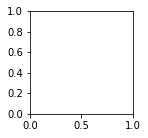

In [31]:
from skimage.io import imshow

# shamelessly stolen from https://github.com/eclarson/MachineLearningNotebooks/blob/master/04.%20Dimension%20Reduction%20and%20Images.ipynb

print(image_data.iloc[5].dtype)

def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images.iloc[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
plot_gallery(image_data, label_data.id, 256, 256)

Fortunately, all of these images are in grayscale, so we don't have to deal with converting RGB values to grayscale. However, the data is a bit messy with regards to the actual x-ray pictures. Many of the images are off-center or badly scaled or rotated such that they don't match up with the rest of the images in the dataset.

As we don't really have a good automated way of dealing with these issues (doing so would require us to already have a classifier for the data), we will simply proceed and see what we can make of the data that we have. However, the methods used here are somewhat simplistic, so this may cause us some problems.

### 2.2 Visualizing Several Images

## 3. Reducing the Data

### 3.1 Linear Dimenionality Reduction using PCA

### 3.2 Non-Linear Dimensionality Reduction

### 3.3 Comparison of Results

### 3.4 Feature Extraction

### 3.5 Evaluation of Feature Extraction Results

## 4. Scale-Invariant Feature Extraction

### 4.1 Explanation

### 4.2 Results and Discussion